In [1]:
import hcipy
import numpy as np
import matplotlib.pyplot as plt

D_tel = 8.2  # meter
wavelength = 1e-6  # meter

pupil_grid = hcipy.make_pupil_grid(512, D_tel)
focal_grid = hcipy.make_focal_grid(32, 16, reference_wavelength=wavelength, f_number=0.3)
prop = hcipy.FraunhoferPropagator(pupil_grid, focal_grid)

aperture = hcipy.circular_aperture(D_tel)(pupil_grid)
wf = hcipy.Wavefront(aperture, wavelength)

fried_parameter = 0.2  # meter
outer_scale = 20  # meter
velocity = 10  # meter/sec

Cn_squared = hcipy.Cn_squared_from_fried_parameter(fried_parameter, wavelength)

/home/marcsgil/Code/tubulence_dataset/.venv/lib/python3.13/site-packages/hcipy/fourier/chirp_z_transform.py:12: SyntaxWarning: invalid escape sequence '\s'
  .. math:: X_k = \sum_{n=0}^{N-1} x(n) z_k^{-n}
/tmp/ipykernel_20332/1461217251.py:12: DeprecationWarning: circular_aperture is deprecated. Its new name is make_circular_aperture.
  aperture = hcipy.circular_aperture(D_tel)(pupil_grid)


In [2]:
layer = hcipy.FiniteAtmosphericLayer(pupil_grid, Cn_squared, outer_scale, velocity)

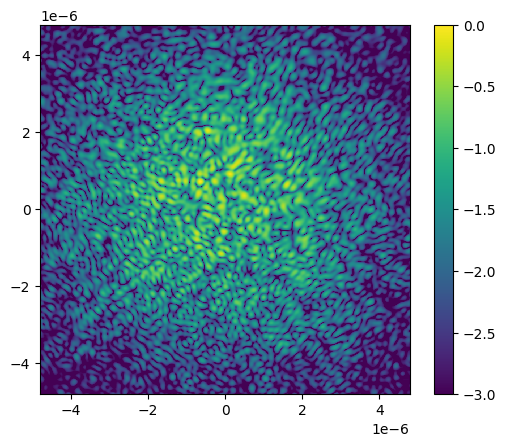

In [6]:
layer.reset()
img = prop(layer(wf))

hcipy.imshow_field(np.log10(img.intensity / img.intensity.max()), vmin=-3)
plt.colorbar()
plt.show()

In [ ]:
layer.

In [143]:
%timeit hcipy.FiniteAtmosphericLayer(pupil_grid, Cn_squared, outer_scale, velocity)

37.5 ms ± 493 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [144]:
%timeit prop(layer(wf))

33.1 ms ± 2.34 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [174]:
%timeit layer.reset()

37.3 ms ± 959 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)
